In [45]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [2]:
pd.options.display.float_format="{:,.2f}".format

In [3]:
df=pd.read_csv("cars.csv")
df.head()

,year,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,price
0,2009,chevrolet,good,8 cylinders,gas,clean,automatic,rwd,full-size,SUV,white,9000
1,2002,gmc,good,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,white,6000
2,2007,pontiac,excellent,4 cylinders,gas,clean,automatic,fwd,compact,convertible,red,7000
3,2012,chevrolet,excellent,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,silver,37000
4,2003,NaN,fair,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,silver,3700


In [4]:
df.shape

(434542, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434542 entries, 0 to 434541
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          434542 non-null  int64 
 1   manufacturer  418698 non-null  object
 2   condition     274367 non-null  object
 3   cylinders     311539 non-null  object
 4   fuel          430894 non-null  object
 5   title_status  431661 non-null  object
 6   transmission  430244 non-null  object
 7   drive         376834 non-null  object
 8   size          181927 non-null  object
 9   type          384280 non-null  object
 10  paint_color   348787 non-null  object
 11  price         434542 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 39.8+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"434,542.00","2,008.99",9.12,"1,900.00","2,006.00","2,011.00","2,015.00","2,020.00"
price,"434,542.00","12,082.36","10,346.56",0.00,"3,999.00","9,495.00","17,881.00","50,934.00"


In [7]:
#Finding the null values
(df.isnull().sum()/df.shape[0])*100

year            0.00
manufacturer    3.65
condition      36.86
cylinders      28.31
fuel            0.84
title_status    0.66
transmission    0.99
drive          13.28
size           58.13
type           11.57
paint_color    19.73
price           0.00
dtype: float64

In [8]:
#Dropping all the rows with the word "Other" in order to try to not confuse the neural network
index_names=df[(df["manufacturer"]=="other") | (df["condition"]=="other") | (df["cylinders"]=="other") |(df["fuel"]=="other") | (df["title_status"]=="other") | (df["transmission"]=="other") | (df["drive"]=="other") | (df["size"]=="other") | (df["type"]=="other") | (df["paint_color"]=="other")].index

df.drop(index_names, inplace=True)

In [9]:
#New shape
df.shape

(398868, 12)

In [10]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")
    

The feature manufacturer contains 43  distinct values 
The feature condition contains 7  distinct values 
The feature cylinders contains 8  distinct values 
The feature fuel contains 5  distinct values 
The feature title_status contains 7  distinct values 
The feature transmission contains 3  distinct values 
The feature drive contains 4  distinct values 
The feature size contains 5  distinct values 
The feature type contains 13  distinct values 
The feature paint_color contains 13  distinct values 


In [11]:
#Finding the null values in the categorical features

(df[categorical].isnull().sum()/df[categorical].shape[0])*100


manufacturer    3.54
condition      35.78
cylinders      25.69
fuel            0.86
title_status    0.68
transmission    0.87
drive          11.98
size           55.61
type           12.20
paint_color    19.72
dtype: float64

In [12]:
#Filling the null values with the mode of each feature
for line in categorical:
    df[line]=df[line].fillna(df[categorical].mode()[line][0])  

In [13]:
#Checking if there is still null values

(df[categorical].isnull().sum()/df[categorical].shape[0])*100

manufacturer   0.00
condition      0.00
cylinders      0.00
fuel           0.00
title_status   0.00
transmission   0.00
drive          0.00
size           0.00
type           0.00
paint_color    0.00
dtype: float64

In [14]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[categorical])

In [15]:
#Concating the new features with the first dataframe
df=pd.concat([df,new_features],axis=1)

In [16]:
#Dropping the categorical columns due to they were transformed in new columns
df=df.drop(columns=categorical)
df.head()

,year,price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2009,9000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2002,6000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,7000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2012,37000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2003,3700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


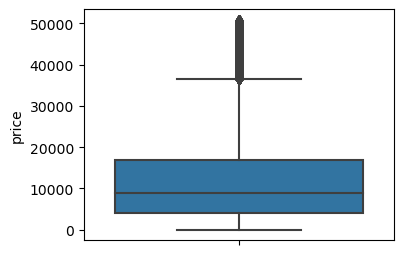

In [17]:
plt.figure(figsize=(4,3));
sns.boxplot(data=df,y="price");

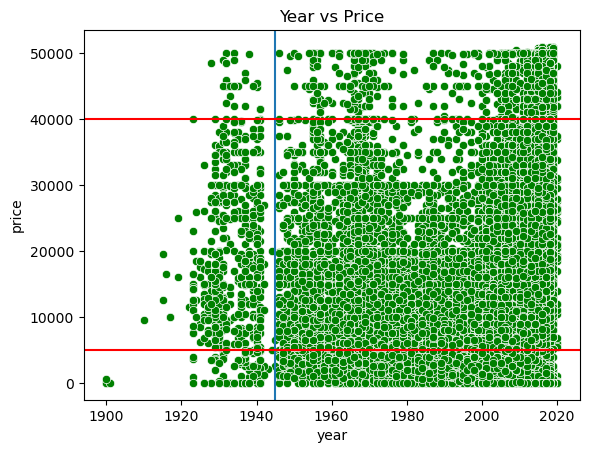

In [18]:
#Analyzing the existing of outliers

sns.scatterplot(data=df,x="year",y="price",color="green");
plt.axvline(1945);
plt.axhline(5000,color="red");
plt.axhline(40000,color="red");
plt.title("Year vs Price");

In [19]:
#The dataframe will work with prices between 5000 and 40000 and a year greater than 1945
df=df[(df["price"].between(5000,40000,inclusive="both")) & (df["year"]> 1945)]
df.head()

,year,price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2009,9000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2002,6000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,7000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2012,37000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,2013,19950,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df.shape

(269204, 100)

In [21]:
#Defining X and y
X=df.drop(columns=["price"])
y=df[["price"]]

In [22]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [23]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)


In [24]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [39]:
#Importing the libraries
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Ensemble
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor,VotingRegressor
from mlxtend import regressor

#Estimators for voting
estimators_voting=[("Ridge",Ridge()),("knn",KNeighborsRegressor()),("Rfr",RandomForestRegressor(n_estimators=10, random_state=1))]

#Estimators for stacking
# Prepare the list of tuples with the first-layer classifiers
regresors = [('Ridge',Ridge()),('knn',KNeighborsRegressor())]
# Instantiate the second-layer meta estimator
reg_meta = RandomForestRegressor()


#Estimators for MLxtend
# Instantiate the 1st-layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf = 11 , min_samples_split = 33, random_state=500)
reg_lr = LinearRegression()
reg_ridge = Ridge(random_state = 500)
# Instantiate the 2nd-layer regressor
reg_meta_mlx = RandomForestRegressor()

In [26]:
#Preparing the models
models={
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elastic Net":ElasticNet(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "XGB Regressor":XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 100, n_jobs=2, objective='reg:squarederror', random_state=500),
    "CatBoost Regressor":CatBoostRegressor(n_estimators =100,learning_rate=0.1, max_depth=3, random_state=500,verbose=0),
    "LGBM Regressor":LGBMRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 100, objective='mean_squared_error', seed=500,force_row_wise=True,verbose=-1),
    "Bagging Regressor":BaggingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor":ExtraTreesRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "Voting Regressor":VotingRegressor(estimators_voting),
    "Stacking Regressor":StackingRegressor(regresors,reg_meta),
    "MLXTend Regressor":regressor.StackingRegressor([reg_dt,reg_lr,reg_ridge],reg_meta_mlx)
}

#Evaluating the models in turn
results=[]
names=[]
scoring="neg_mean_squared_error"
y_t=y_train.values.reshape(-1,1)
for name, model in models.items():
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=-cross_val_score(model,X_train.values,y_t.ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean():,.4f} ({cv_results.std():.4f})")

Lasso :1.0000 (0.0113)
Ridge :0.6661 (0.0122)
Elastic Net :1.0000 (0.0083)
KNN :0.3595 (0.0048)
Decision Tree :0.2902 (0.0041)
XGB Regressor :0.3325 (0.0042)
CatBoost Regressor :0.3487 (0.0059)
LGBM Regressor :0.3322 (0.0045)
Bagging Regressor :0.2411 (0.0050)
Random Forest Regressor :0.2332 (0.0049)
Extra Trees Regressor :0.2450 (0.0028)
AdaBoostRegressor :0.6393 (0.0378)
GradientBoostingRegressor :0.3324 (0.0015)
Voting Regressor :0.2979 (0.0039)
Stacking Regressor :0.3819 (0.0048)
MLXTend Regressor :0.2515 (0.0040)


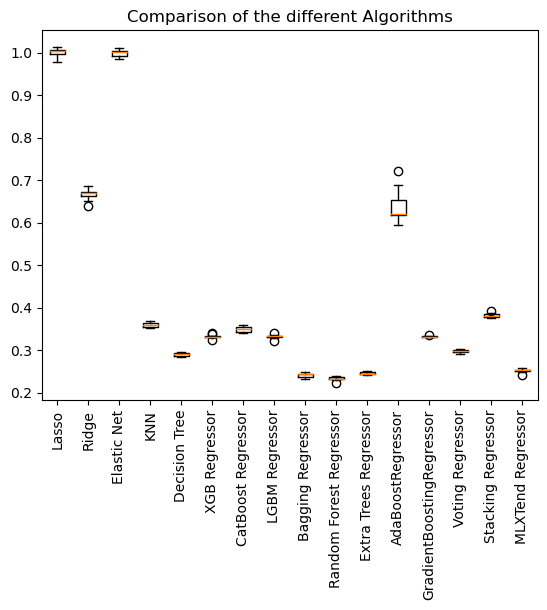

In [27]:
#Comparing the models

import matplotlib.pyplot as plt
import numpy as np

plt.title("Comparison of the different Algorithms")
plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names,rotation="vertical")
plt.show()

In [40]:
#Fine Tuning the best model

import numpy as np

n_estimators=np.arange(2,20)

parameters=dict(n_estimators=n_estimators)

model=RandomForestRegressor()

kfold=KFold(n_splits=10,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

y_t=y_train.values.reshape(-1,1)

grid_result.fit(X_train,y_t.ravel())

#Summarize_results
print("Best : %f using the params : %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]

for mean,stdev,param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.763707 using the params : {'n_estimators': 19}
0.724278 (0.005507) with {'n_estimators': 2}
0.737421 (0.006492) with {'n_estimators': 3}
0.746207 (0.005739) with {'n_estimators': 4}
0.750090 (0.005266) with {'n_estimators': 5}
0.752518 (0.005582) with {'n_estimators': 6}
0.755714 (0.005569) with {'n_estimators': 7}
0.757080 (0.004980) with {'n_estimators': 8}
0.758659 (0.005244) with {'n_estimators': 9}
0.759200 (0.005316) with {'n_estimators': 10}
0.759843 (0.005705) with {'n_estimators': 11}
0.760465 (0.005345) with {'n_estimators': 12}
0.761619 (0.005583) with {'n_estimators': 13}
0.761952 (0.005289) with {'n_estimators': 14}
0.762293 (0.005361) with {'n_estimators': 15}
0.762362 (0.005309) with {'n_estimators': 16}
0.763005 (0.005123) with {'n_estimators': 17}
0.763408 (0.005054) with {'n_estimators': 18}
0.763707 (0.004863) with {'n_estimators': 19}


In [41]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))
dump(scaler_y,open("scaler_y.pkl","wb"))


In [42]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_sklearn.pkl","wb"))

In [43]:
#Evaluating the model using the scalers correctly

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(grid_result.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 2716.809480 , RMSE : 4051.078379 , R2 : 0.770001


In [32]:
y.mean()[0].round(2)

15492.65

In [33]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )
    

Real = 9750 , Prediction = 13115 
Real = 18750 , Prediction = 17154 
Real = 6495 , Prediction = 5732 
Real = 39000 , Prediction = 37603 
Real = 9330 , Prediction = 8723 
Real = 14981 , Prediction = 14570 
Real = 14999 , Prediction = 11950 
Real = 6900 , Prediction = 7614 
Real = 13995 , Prediction = 13691 
Real = 12999 , Prediction = 11525 
Real = 7399 , Prediction = 7496 
Real = 9995 , Prediction = 12765 
Real = 20900 , Prediction = 18620 
Real = 8995 , Prediction = 10519 
Real = 7000 , Prediction = 25406 
Real = 8995 , Prediction = 8425 
Real = 11950 , Prediction = 14809 
Real = 6599 , Prediction = 9316 
Real = 10995 , Prediction = 16462 
Real = 7990 , Prediction = 7990 


In [34]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X.columns,range(X.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [28]:
##HYPERPARAMETER TUNING WITH HYPEROPT

from hyperopt import hp,fmin,tpe
import numpy as np

# Set up space dictionary with specified hyperparameters

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 20, 1)
}


# Set up objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']) 
        
    }
    rfc_clf = RandomForestRegressor(**params) 
    best_score = -cross_val_score(rfc_clf, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=4).mean()
    return best_score

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=10, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

100%|███████████████████████████████████████████████| 10/10 [06:30<00:00, 39.03s/trial, best loss: 0.24628982540801622]
{'n_estimators': 17.0}


In [44]:
#Creating the model with the results gotten from the Hyperopt and evaluating it using different scalers

modelo=RandomForestRegressor(n_estimators= 17)

modelo.fit(X_train,y_train.values.ravel())

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(modelo.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test.values.ravel(),y_pred.values.ravel())

rmse=np.sqrt(mean_squared_error(y_test.values.ravel(),y_pred.values.ravel()))

r2=r2_score(y_test.values.ravel(),y_pred.values.ravel())

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 2722.040250 , RMSE : 4055.061505 , R2 : 0.769548


In [37]:
#SOLVING THE PROBLEM WITH GENETIC ALGORITHMS

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)


from tpot import TPOTRegressor
# Assign the values outlined to the inputs
number_generations = 3
population_size = 3
offspring_size = 3
scoring_function = 'neg_mean_squared_error'

# Create the tpot classifier
tpot_clf = TPOTRegressor(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train.values , y_train.values.ravel())

print("="*30)

# Score on the test set

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

print("MSE",-tpot_clf.score(X_test.values , y_test.values.ravel()))

Optimization Progress:   0%|          | 0/12 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.35992635176821924

Generation 2 - Current best internal CV score: -0.35992635176821924

Generation 3 - Current best internal CV score: -0.35992635176821924

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=8, min_samples_leaf=12, min_samples_split=7)
MSE 0.3600768746634208


In [262]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [24]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early=EarlyStopping(monitor="val_loss", patience=20)

In [46]:
#Creating the model
model=Sequential()
model.add(Dense(256,input_dim=X.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

#Compiling the model
model.compile(optimizer="adam", loss="mse")

#Fitting the model
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_split=0.25, callbacks=[early])

Epoch 1/200
4417/4417 [==============================] - 23s 5ms/step - loss: 0.3283 - val_loss: 0.2978
Epoch 2/200
4417/4417 [==============================] - 20s 5ms/step - loss: 0.2806 - val_loss: 0.2710
Epoch 3/200
4417/4417 [==============================] - 20s 4ms/step - loss: 0.2692 - val_loss: 0.2693
Epoch 4/200
4417/4417 [==============================] - 19s 4ms/step - loss: 0.2619 - val_loss: 0.2630
Epoch 5/200
4417/4417 [==============================] - 19s 4ms/step - loss: 0.2556 - val_loss: 0.2639
Epoch 6/200
4417/4417 [==============================] - 20s 4ms/step - loss: 0.2521 - val_loss: 0.2590
Epoch 7/200
4417/4417 [==============================] - 19s 4ms/step - loss: 0.2469 - val_loss: 0.2611
Epoch 8/200
4417/4417 [==============================] - 19s 4ms/step - loss: 0.2426 - val_loss: 0.2546
Epoch 9/200
4417/4417 [==============================] - 19s 4ms/step - loss: 0.2391 - val_loss: 0.2539
Epoch 10/200
4417/4417 [==============================] - 19s 4m

In [47]:
#Evaluating the tuned model using the test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

model.evaluate(X_test_scaled,y_test_scaled,verbose=0)

0.25215739011764526

In [48]:
#Evaluating the MAE,RMSE and R2 of the neural network

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled,verbose=0).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 2952.354318 , RMSE : 4247.363015 , R2 : 0.747172


In [26]:
##Using CV Score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function():
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss="mse")
    return model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

modelo=KerasRegressor(build_fn=model_function,epochs=20,batch_size=16,verbose=0)

cv=-cross_val_score(modelo,X_train,y_train,cv=5,scoring="neg_mean_squared_error")

print("MSE: ",cv.mean())

MSE:  0.25369985527087285


In [27]:
##Tuning hyperparameters

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def model_function(optimizer="adam",activation="relu"):
    model=Sequential()
    model.add(Dense(256,activation=activation,input_dim=X_train.shape[1]))
    model.add(Dense(128,activation=activation))
    model.add(Dense(64,activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer,loss="mse",metrics="mse")
    return model

modelo=KerasRegressor(build_fn=model_function,epochs=3,batch_size=16,verbose=0)

parameters={
    "optimizer":["adam","sgd","rmsprop"],
    "activation":["relu","sigmoid"],
    "epochs":[10,20,40,80],
    "batch_size":[16,32,64]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", -results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

C:\Users\DAVID\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-0.2655198  -0.27187742 -0.30187576 -0.25887215 -0.28876412         nan
 -0.28094713 -0.31466138 -0.27019489 -0.26079679]
  warnings.warn(


Best Score 0.2588721513748169
Best Parameters {'optimizer': 'rmsprop', 'epochs': 10, 'batch_size': 64, 'activation': 'relu'}


In [28]:
##Tuning layers and neurons

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function_2(dense_layers_extra=2,nn=100):
    model=Sequential()
    model.add(Dense(units=nn,activation="relu",input_dim=X_train.shape[1]))
    
    for i in range(1,dense_layers_extra+1):
        model.add(Dense(units=nn, activation="relu"))
        
    model.add(Dense(1))
    
    model.compile(optimizer="adam",loss="mse",metrics="mse")
    
    return model

modelo=KerasRegressor(build_fn=model_function_2,epochs=3,batch_size=16,verbose=0)

parameters={
    "dense_layers_extra":[1,2,3,4],
    
    "nn":[32,64,128,256]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", -results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.26896841327349347
Best Parameters {'nn': 128, 'dense_layers_extra': 3}


In [29]:
#Creating the model with the best parameters
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop",loss="mse")
history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
2356/2356 [==============================] - 12s 4ms/step - loss: 0.3346 - val_loss: 0.2852
Epoch 2/10
2356/2356 [==============================] - 10s 4ms/step - loss: 0.2802 - val_loss: 0.2986
Epoch 3/10
2356/2356 [==============================] - 10s 4ms/step - loss: 0.2692 - val_loss: 0.2709
Epoch 4/10
2356/2356 [==============================] - 10s 4ms/step - loss: 0.2611 - val_loss: 0.2704
Epoch 5/10
2356/2356 [==============================] - 9s 4ms/step - loss: 0.2577 - val_loss: 0.2654
Epoch 6/10
2356/2356 [==============================] - 11s 4ms/step - loss: 0.2523 - val_loss: 0.2654
Epoch 7/10
2356/2356 [==============================] - 10s 4ms/step - loss: 0.2488 - val_loss: 0.2588
Epoch 8/10
2356/2356 [==============================] - 9s 4ms/step - loss: 0.2455 - val_loss: 0.2620
Epoch 9/10
2356/2356 [==============================] - 10s 4ms/step - loss: 0.2434 - val_loss: 0.2598
Epoch 10/10
2356/2356 [==============================] - 10s 4ms/step - los

In [36]:
#Evaluating the tuned model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)


y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled,verbose=0).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 3098.107870 , RMSE : 4289.587745 , R2 : 0.742121


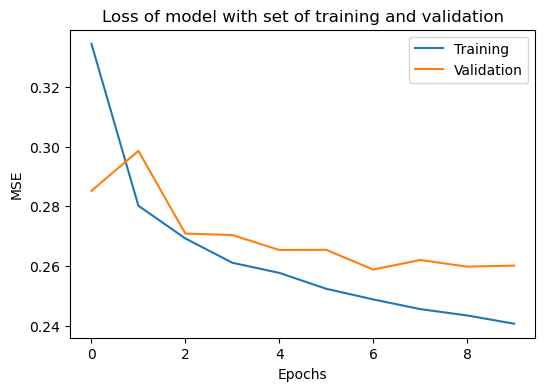

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"])
plt.title("Loss of model with set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("MSE");
plt.legend(["Training","Validation"],loc="upper right");

In [38]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 9750 , Prediction = 11392 
Real = 18750 , Prediction = 17084 
Real = 6495 , Prediction = 7729 
Real = 39000 , Prediction = 31995 
Real = 9330 , Prediction = 11187 
Real = 14981 , Prediction = 16250 
Real = 14999 , Prediction = 10497 
Real = 6900 , Prediction = 8680 
Real = 13995 , Prediction = 11184 
Real = 12999 , Prediction = 10657 
Real = 7399 , Prediction = 9490 
Real = 9995 , Prediction = 13604 
Real = 20900 , Prediction = 16036 
Real = 8995 , Prediction = 10147 
Real = 7000 , Prediction = 15225 
Real = 8995 , Prediction = 9379 
Real = 11950 , Prediction = 15101 
Real = 6599 , Prediction = 8653 
Real = 10995 , Prediction = 16309 
Real = 7990 , Prediction = 9211 
